#### Load the neccessary libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#### Import the dataset

In [50]:
df = pd.read_csv('D:/Academic/CS/EDA_Assignment/data/raw/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [51]:
df_multivariate_analysis = df.copy()

##### terminologies:
* hypertension - high blood pressure
* target column - stroke (1) or no stroke (0)

#### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##### Observations
* there are missing values only in the bmi column. no other column caintaining missing values
* bmi value depend on the weight and height of the person, in this dataset we don't have weight and height columns, so we cannot generate the missing values based on that

##### Treatment for missing values

In [6]:
missing_count = df['bmi'].isna().sum()
total_count = len(df)
missing_percentage = (missing_count / total_count) * 100
print(f"Percentage of missing values in 'bmi' column: {missing_percentage:.2f}%")

Percentage of missing values in 'bmi' column: 3.93%


##### Rule of thumb when dealing with missing values:

* <5%: Generally safe to use any method
* 5-15%: Consider imputation carefully
* 15-30%: Deletion may be risky, advanced imputation needed
* >30%: Consider dropping the variable entirely

* Need to check is there any column cause missing values in other columns

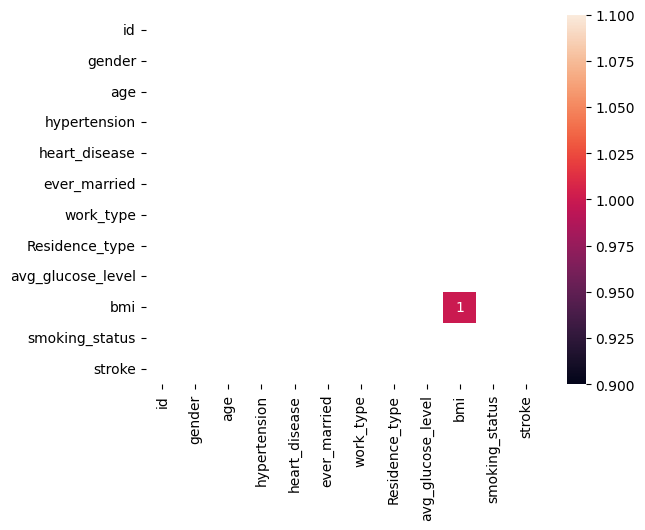

In [7]:
# Create missing value indicators
missing_df = df.isnull()

# Correlation matrix of missing patterns
corr_missing = missing_df.corr()
sns.heatmap(corr_missing, annot=True)
plt.show()

* since there only one column with missing values we can say other columns are not causing missing values in the bmi column

##### Take distribution of bmi column

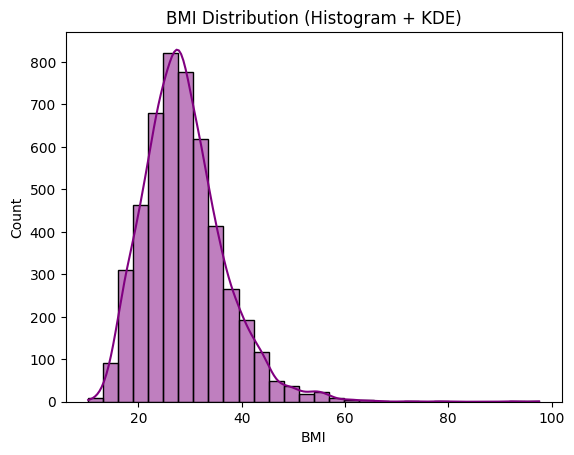

In [8]:
sns.histplot(df, x='bmi', bins=30, color='purple', kde=True, edgecolor='black')

plt.title("BMI Distribution (Histogram + KDE)")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

* we can conclude that the distribution is right skewed.
* since the mean is pulled upward by the skew and outliers, so it will likely overestimate typical BMI values if I use mean as imputer.
* therefore, the median is a more robust measure of central tendency for this right-skewed distribution, as it is less affected by extreme values and provides a better representation of the typical BMI in this dataset.

In [9]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


* now there is no missing values in the dataset

##### Outlier Detection and Treatment

* we have two methods to detect outliers
  1. IQR
  2. Z-score
* first i need to check what are the distribution of this numerical colums

In [11]:
num_columns = ['age', 'avg_glucose_level', 'bmi']

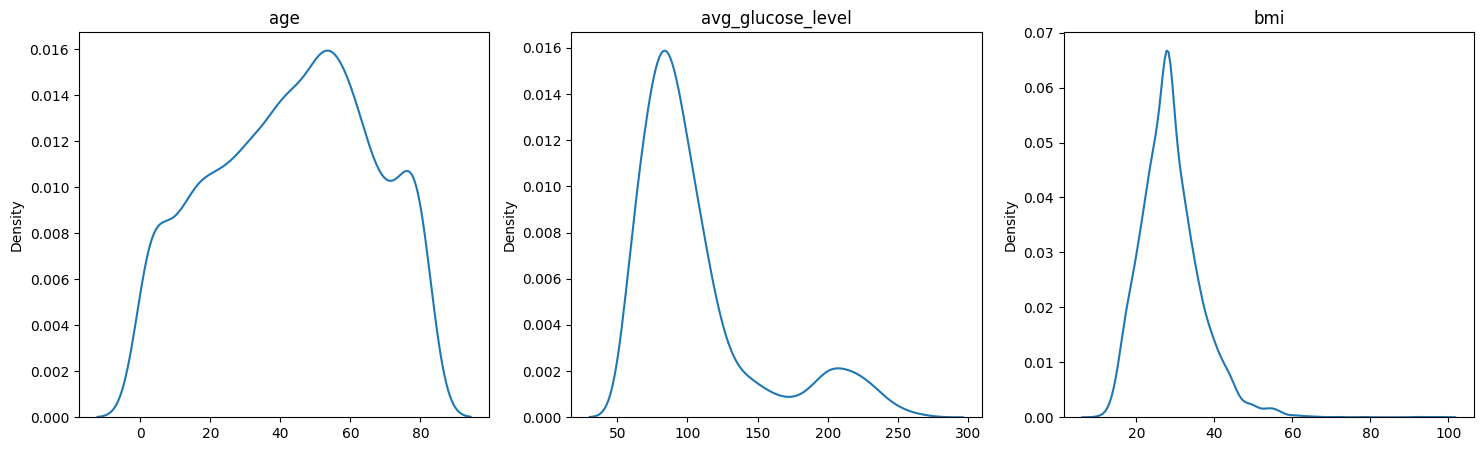

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()
for i, col in enumerate(num_columns):
    sns.kdeplot(df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

plt.show()

* here age looks like normal distribution, but avg_glucose_level and bmi looks like right skewed distribution
* so i can use z-score method for age column and IQR method for avg_glucose_level and bmi columns
* but for simplicity i gonna use IQR method for all numerical columns

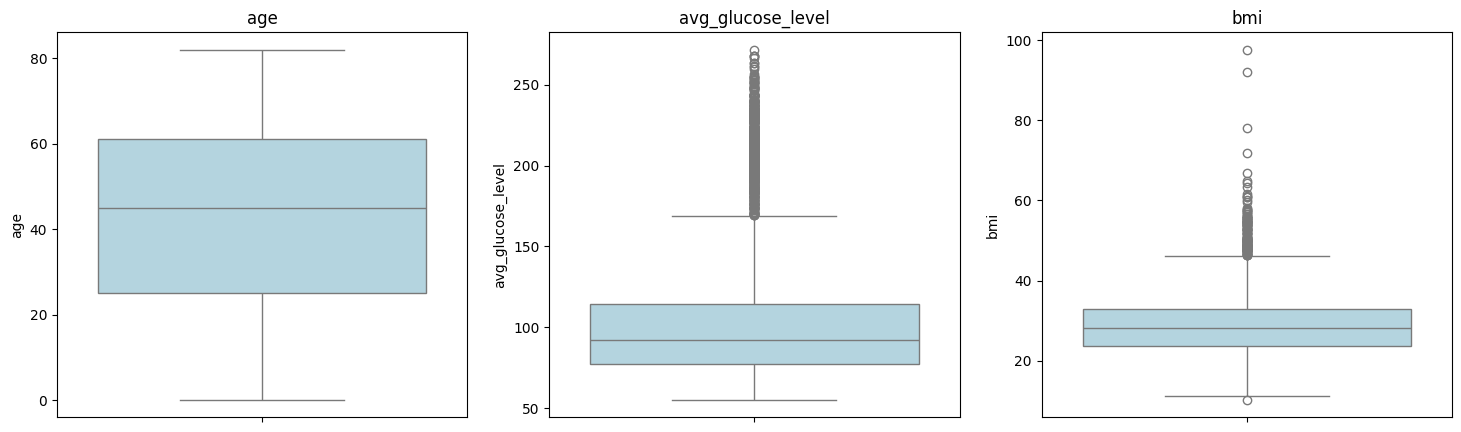

In [13]:
# this boxplot method internely use IQR method to detect outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(num_columns):
    sns.boxplot(y=df[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'{col}')

* look like age column has no outliers but avg_glucose_level and bmi columns have outliers
* next we take the outliers count and precentage of each numerical columns

In [14]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [15]:
for col in num_columns:
    outliers = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    print(f"{col} - Outliers: {outlier_count}, Percentage: {outlier_percentage:.2f}%")

age - Outliers: 0, Percentage: 0.00%
avg_glucose_level - Outliers: 627, Percentage: 12.27%
bmi - Outliers: 126, Percentage: 2.47%


* i can't blindly delete these outliers before do anything i need to identify the context
* before apply any outlier treatment method i need to check whther these outliers are biologically possible or not

In [16]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

average glucose level ranges like this
* Normal: 70 to 99
* Prediabetes: 100 to 125
* Diabetes: 126 or higher
* Higher levels : Levels above 140 can be also exist due to the various condition

In [17]:
df['bmi'].describe()

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

usualy bmi value range like this
* Below 18.5 - Underweight
* 18.5 to 24.9 - Normal weight
* 25 to 29.9 - Overweight
* 30 or higher - Obesity

* since this outliers are biologically possible(in extreme cases) we cannot delete them. so i decided to treat these outliers with capping method

In [18]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Cap values
    df[column] = df[column].apply(lambda x: lower_limit if x < lower_limit 
                                  else upper_limit if x > upper_limit 
                                  else x)
    return df

In [19]:
df = cap_outliers_iqr(df, 'avg_glucose_level')
df = cap_outliers_iqr(df, 'bmi')

* checking the distribution after outlier treatment

In [20]:
for col in num_columns:
    outliers = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    print(f"{col} - Outliers: {outlier_count}, Percentage: {outlier_percentage:.2f}%")

age - Outliers: 0, Percentage: 0.00%
avg_glucose_level - Outliers: 0, Percentage: 0.00%
bmi - Outliers: 0, Percentage: 0.00%


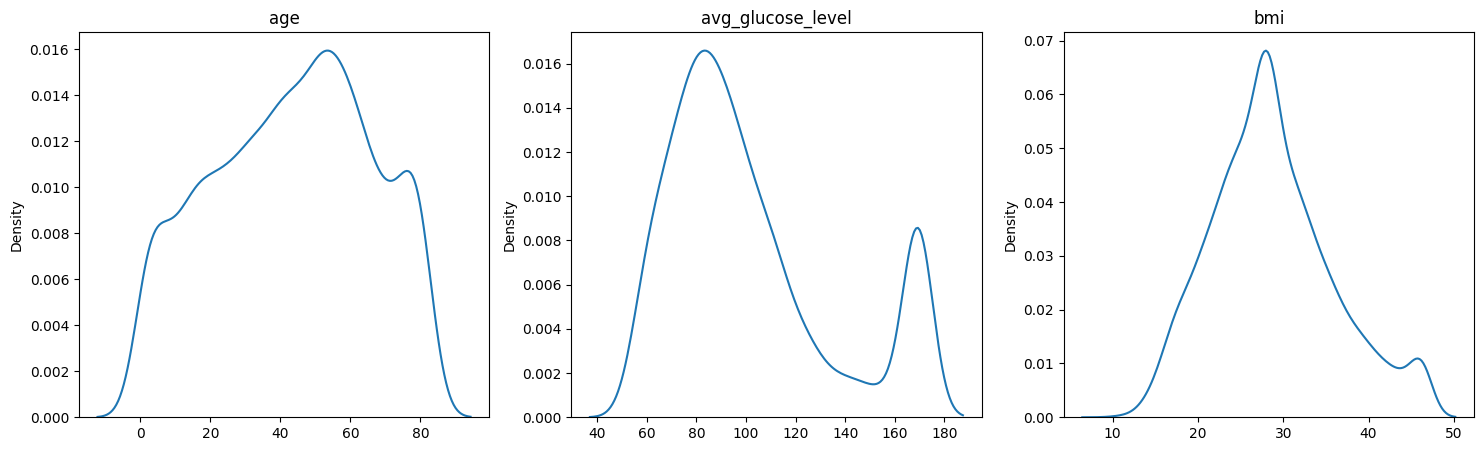

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()
for i, col in enumerate(num_columns):
    sns.kdeplot(df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

plt.show()

#### Encoding Categorical Columns

In [22]:
cat_columns = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [25]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

* since gender is nominal categorical column we can use one hot encoding method

In [26]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

* we can use binary mapping here because ever_married column contains only two categories

In [27]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

* one hot encoding for work_type column

In [28]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

* one hot encodign is suitable

In [29]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

* just use binary mapping for Residence_type column

Rule of Thumb

* Binary categorical (2 categories) → ✅ Use mapping (0/1).

* Nominal categorical (>2 categories, no order) → ✅ Use One-Hot Encoding.

* Ordinal categorical (ordered categories) → ✅ Use Ordinal Encoding.

In [30]:
cat_columns_ohe = ['gender', 'work_type', 'smoking_status']

df = pd.get_dummies(df, columns=cat_columns_ohe, drop_first=True)

In [31]:
# Map ever_married: Yes -> 1, No -> 0
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

# Map Residence_type: Urban -> 1, Rural -> 0
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

In [32]:
df

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,1,169.3575,36.6,1,True,False,False,True,False,False,True,False,False
1,51676,61.0,0,0,1,0,169.3575,28.1,1,False,False,False,False,True,False,False,True,False
2,31112,80.0,0,1,1,0,105.9200,32.5,1,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,1,1,169.3575,34.4,1,False,False,False,True,False,False,False,False,True
4,1665,79.0,1,0,1,0,169.3575,24.0,1,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,1,1,83.7500,28.1,0,False,False,False,True,False,False,False,True,False
5106,44873,81.0,0,0,1,1,125.2000,40.0,0,False,False,False,False,True,False,False,True,False
5107,19723,35.0,0,0,1,0,82.9900,30.6,0,False,False,False,False,True,False,False,True,False
5108,37544,51.0,0,0,1,0,166.2900,25.6,0,True,False,False,True,False,False,True,False,False


#### Normalization/Standardization

In [39]:
nor_columns = ['age', 'avg_glucose_level', 'bmi', 'avg_glucose_level']

* since avg_glucose_level and bmi columns are right skewed distribution we can use standardization method for these two columns
* age column okay for both normalization and standardization

In [35]:
# Create scaler
scaler = StandardScaler()

In [36]:
# Fit and transform
df[nor_columns] = scaler.fit_transform(df[nor_columns])

#### Post Processing

In [37]:
df

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.051434,0,1,1,1,2.058363,1.110872,1,True,False,False,True,False,False,True,False,False
1,51676,0.786070,0,0,1,0,2.058363,-0.082921,1,False,False,False,False,True,False,False,True,False
2,31112,1.626390,0,1,1,0,0.148256,0.535043,1,True,False,False,True,False,False,False,True,False
3,60182,0.255342,0,0,1,1,2.058363,0.801890,1,False,False,False,True,False,False,False,False,True
4,1665,1.582163,1,0,1,0,2.058363,-0.658751,1,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.626390,1,0,1,1,-0.519284,-0.082921,0,False,False,False,True,False,False,False,True,False
5106,44873,1.670617,0,0,1,1,0.728778,1.588389,0,False,False,False,False,True,False,False,True,False
5107,19723,-0.363842,0,0,1,0,-0.542168,0.268195,0,False,False,False,False,True,False,False,True,False
5108,37544,0.343796,0,0,1,0,1.966000,-0.434037,0,True,False,False,True,False,False,True,False,False


In [40]:
columns_to_remove = ['id']
df.drop(columns=columns_to_remove, inplace=True)

In [41]:
df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,0,1,1,1,2.058363,1.110872,1,True,False,False,True,False,False,True,False,False
1,0.786070,0,0,1,0,2.058363,-0.082921,1,False,False,False,False,True,False,False,True,False
2,1.626390,0,1,1,0,0.148256,0.535043,1,True,False,False,True,False,False,False,True,False
3,0.255342,0,0,1,1,2.058363,0.801890,1,False,False,False,True,False,False,False,False,True
4,1.582163,1,0,1,0,2.058363,-0.658751,1,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.626390,1,0,1,1,-0.519284,-0.082921,0,False,False,False,True,False,False,False,True,False
5106,1.670617,0,0,1,1,0.728778,1.588389,0,False,False,False,False,True,False,False,True,False
5107,-0.363842,0,0,1,0,-0.542168,0.268195,0,False,False,False,False,True,False,False,True,False
5108,0.343796,0,0,1,0,1.966000,-0.434037,0,True,False,False,True,False,False,True,False,False


In [45]:
true_num_columns = ['age', 'avg_glucose_level', 'bmi']

=======================================================================================================================

#### SPLOM (Scatterplot Matrix)

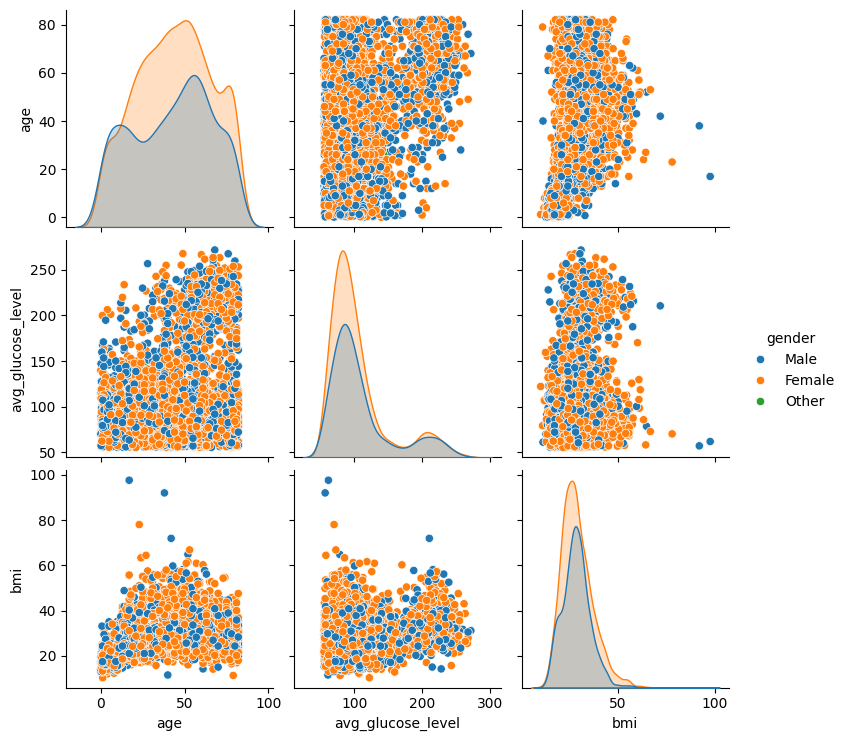

In [53]:
sns.pairplot(df_multivariate_analysis, vars=['age', 'avg_glucose_level', 'bmi'], hue='gender')
plt.show()

#### Correlation Heatmap

In [46]:
df_numerical = pd.DataFrame(df, columns=true_num_columns)
df_numerical

,age,avg_glucose_level,bmi
0,1.051434,2.058363,1.110872
1,0.786070,2.058363,-0.082921
2,1.626390,0.148256,0.535043
3,0.255342,2.058363,0.801890
4,1.582163,2.058363,-0.658751
...,...,...,...
5105,1.626390,-0.519284,-0.082921
5106,1.670617,0.728778,1.588389
5107,-0.363842,-0.542168,0.268195
5108,0.343796,1.966000,-0.434037


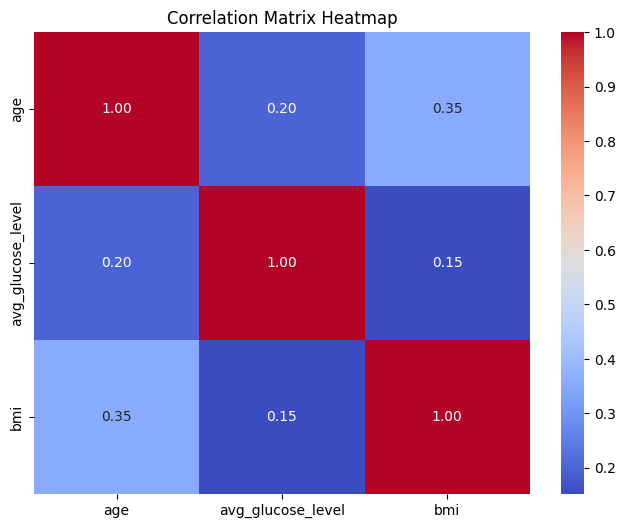

In [47]:
# Compute correlation matrix
corr = df_numerical.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix Heatmap")
plt.show()

##### Parallel Coordinates Plot

In [54]:
from pandas.plotting import parallel_coordinates

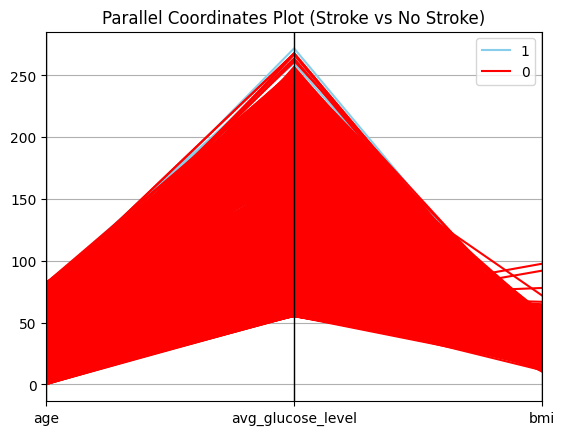

In [55]:
parallel_coordinates(df[['age','avg_glucose_level','bmi','stroke']], 'stroke', color=['skyblue','red'])

plt.title("Parallel Coordinates Plot (Stroke vs No Stroke)")
plt.show()

##### PCA 2D Plot in Python 

* Use PCA mainly on continuous numeric features (age, bmi, glucose, etc.).
* Use categorical variables (like gender, work_type) only as labels (hue) for coloring the PCA plot.

In [56]:
from sklearn.decomposition import PCA

# Take only numerical features
X = df.select_dtypes(include=['float64','int64']).drop(columns=['stroke'])

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['stroke'], cmap='coolwarm', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D Plot (Stroke vs No Stroke)")
plt.colorbar(label="Stroke")
plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values